# Descriptive Statistics and Probability Theory


### This notebook is by Nana Amina Abubakar for Data Science MBAN 6110 T

Scenario:

You are a data analyst at an e-commerce company that sells a variety of products. Your company wants to better understand how various products perform across regions, in order to devise its sales strategy for next year.

You have been provided with data includes information about the product, the region where the product was sold, the price of the product, the number of units sold, and the date of the sale.

Your task is to clean the data as you see fit, and conduct exploratory analysis which will help the company build a sales strategy for the following year.

In addition to the analysis, be sure to answer the following questions:

1) What conclusions can you draw about sales performance of various products and regions?

2) What recommendations do you have for the business?

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?


## Content

1. [Import Libraries](#1.-Import-Libraries)

2. [Data Cleaning](#2.-Data-Cleaning)

3. [Data Exploration](#3.-Data-Exploration)

4. [Conclusions](#4.-Conclusions)


### 1. Import Libraries

I imported all the libraries to be used in this notebook. I do this at the beginning of every project for a better final outlook and presentation to the target audience.

In [1]:
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations. Pandas is built on Numpy
import csv # to read and write csv files
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import warnings
warnings.filterwarnings('ignore')


### 2. Data Cleaning

I handled all missing values, removed duplicates, corrected data types, and addressed any outliers or anomalies. 


This section answers:
 Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

In [2]:
# reading the data in jupyter notebook

df = pd.read_csv('sales_data.csv')

In [3]:
# to give the top 5 data entries

df.head() 

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05


In [4]:
# to give the bottom 5 data entries

df.tail() 

,Product,Region,Price,Units Sold,Sale Date
1045,Product_42,Region_3,18.63,9.0,2023-07-10
1046,Product_4,Region_3,159.27,10.0,2024-07-14
1047,Product_43,Region_1,2.91,13.0,2023-08-17
1048,Product_27,Region_7,1.96,8.0,2024-03-10
1049,Product_3,NaN,302.68,11.0,2023-09-09


In [5]:
#Get the number of rows and columns

df.shape 

(1050, 5)

In [6]:
# Check the column names in the DF

df.columns 

Index(['Product', 'Region', 'Price', 'Units Sold', 'Sale Date'], dtype='object')

In [7]:
# View the data types in the DF

#The missing value for each column is around 11% of the number of entries. 
# I can choose to delete them all together but i decided to further clean the data to avoid bias. 

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [8]:
# tells the mean, median, mode and quartiles of the df.
#This gives me better view of the number of entries and the number of missing data per column.

df.describe(include="all") 

,Product,Region,Price,Units Sold,Sale Date
count,947,942,945.000000,943.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2024-06-17
freq,30,112,NaN,NaN,2
mean,NaN,NaN,108.628011,10.200424,NaN
std,NaN,NaN,167.350086,3.247589,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.420000,8.000000,NaN
50%,NaN,NaN,64.640000,10.000000,NaN
75%,NaN,NaN,142.310000,12.000000,NaN


### Removing duplicates

In [9]:
#Sales date had 50 duplicates 

df['Sale Date'].value_counts()

2024-06-17    2
2024-04-01    2
2022-02-03    2
2022-05-03    2
2023-03-05    2
             ..
2023-05-25    1
2023-02-21    1
2022-07-06    1
2022-06-19    1
2022-07-29    1
Name: Sale Date, Length: 1000, dtype: int64

In [10]:
#I chose to remove these duplicates
#Assumption- data is entered at the end of each day 
#hence there should be unique sales date and no duplicates.

df = df.drop_duplicates()

In [11]:
df.describe(include="all")

,Product,Region,Price,Units Sold,Sale Date
count,900,901,901.000000,901.000000,1001
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-02-22
freq,28,109,NaN,NaN,2
mean,NaN,NaN,108.922597,10.173141,NaN
std,NaN,NaN,169.931751,3.267175,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.870000,8.000000,NaN
50%,NaN,NaN,66.410000,10.000000,NaN
75%,NaN,NaN,141.150000,12.000000,NaN


In [12]:
# One duplicate value was still present which i needed to remove.
# It is clear that duplicate is an entry error

subset_data = df[df['Sale Date'] == '2023-02-22']
print(subset_data)

     Product    Region    Price  Units Sold   Sale Date
417      NaN  Region_5   254.46        15.0  2023-02-22
1026     NaN  Region_5  2544.60        15.0  2023-02-22


In [13]:
df = df.drop(index=1026)

In [14]:
subset_data = df[df['Sale Date'] == '2023-02-22']
print(subset_data)

    Product    Region   Price  Units Sold   Sale Date
417     NaN  Region_5  254.46        15.0  2023-02-22


In [15]:
#sales date has been fully cleaned.

df.describe(include="all")

,Product,Region,Price,Units Sold,Sale Date
count,900,900,900.000000,900.000000,1000
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-10-10
freq,28,108,NaN,NaN,1
mean,NaN,NaN,106.216289,10.167778,NaN
std,NaN,NaN,149.340425,3.265021,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.817500,8.000000,NaN
50%,NaN,NaN,66.315000,10.000000,NaN
75%,NaN,NaN,140.835000,12.000000,NaN


### Filling empty cells
The remaining columns had empty cells which needed to be filled with different methods.

In [16]:
#this shows that only sale date has no empty entry

df.isna().any()

Product        True
Region         True
Price          True
Units Sold     True
Sale Date     False
dtype: bool

In [17]:
#to show the ranking of each product

df['Product'].value_counts()

Product_4     28
Product_24    28
Product_43    26
Product_23    24
Product_49    24
Product_40    24
Product_8     23
Product_50    21
Product_17    21
Product_3     21
Product_19    21
Product_1     20
Product_10    20
Product_9     20
Product_27    20
Product_15    20
Product_36    20
Product_37    19
Product_45    19
Product_42    19
Product_2     19
Product_38    19
Product_28    19
Product_22    19
Product_7     18
Product_26    18
Product_6     17
Product_13    17
Product_48    17
Product_31    17
Product_20    16
Product_46    16
Product_34    16
Product_33    16
Product_30    16
Product_29    15
Product_21    15
Product_16    15
Product_44    15
Product_25    14
Product_32    14
Product_12    13
Product_41    13
Product_35    13
Product_5     13
Product_18    13
Product_11    13
Product_14    13
Product_47    12
Product_39    11
Name: Product, dtype: int64

In [21]:
# because the difference between the top 3 products is just multiples of 2
#I used the fill forward method.
#Using the median here will shoot up the top performing product and I wanted to avoid that

df['Product'].fillna(method='ffill', inplace=True)

In [22]:
# the ranking did not change significantly especially for the top 3 which was my goal to avoid bias

df['Product'].value_counts()

Product_24    31
Product_43    30
Product_4     29
Product_23    28
Product_8     27
Product_40    27
Product_49    26
Product_1     25
Product_3     24
Product_45    23
Product_19    23
Product_37    23
Product_9     23
Product_15    23
Product_50    22
Product_38    22
Product_28    22
Product_10    22
Product_17    22
Product_27    21
Product_42    21
Product_22    21
Product_36    20
Product_48    20
Product_13    20
Product_7     20
Product_6     20
Product_20    19
Product_34    19
Product_2     19
Product_21    18
Product_26    18
Product_31    18
Product_30    17
Product_44    17
Product_12    16
Product_25    16
Product_46    16
Product_29    16
Product_33    16
Product_16    15
Product_5     15
Product_18    15
Product_32    14
Product_47    14
Product_35    14
Product_11    14
Product_41    13
Product_39    13
Product_14    13
Name: Product, dtype: int64

In [23]:
#After doing this, the product section had no empty columns

df.isna().any() 

Product       False
Region         True
Price          True
Units Sold     True
Sale Date     False
dtype: bool

In [24]:
# I checked the ranking of the regions

df['Region'].value_counts()

Region_5     108
Region_9      95
Region_2      94
Region_8      93
Region_4      88
Region_10     87
Region_1      86
Region_7      85
Region_6      83
Region_3      81
Name: Region, dtype: int64

In [25]:
# I used the same fill forward method here the same reason applies

df['Region'].fillna(method='ffill', inplace=True)

In [26]:
# the ranking did not change significantly especially for the top 3 which was my goal to avoid bias

df['Region'].value_counts()

Region_5     122
Region_9     109
Region_2     105
Region_10    103
Region_8     102
Region_4      94
Region_7      94
Region_1      93
Region_6      92
Region_3      86
Name: Region, dtype: int64

In [27]:
#After doing this, the Region section had no empty columns

df.isna().any()

Product       False
Region        False
Price          True
Units Sold     True
Sale Date     False
dtype: bool

In [28]:
# I viewed my data again. Price and units sold must be cleaned

df.describe(include="all") 

,Product,Region,Price,Units Sold,Sale Date
count,1000,1000,900.000000,900.000000,1000
unique,50,10,NaN,NaN,1000
top,Product_24,Region_5,NaN,NaN,2023-10-10
freq,31,122,NaN,NaN,1
mean,NaN,NaN,106.216289,10.167778,NaN
std,NaN,NaN,149.340425,3.265021,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.817500,8.000000,NaN
50%,NaN,NaN,66.315000,10.000000,NaN
75%,NaN,NaN,140.835000,12.000000,NaN


In [29]:
# Since the mean!=the median, i replaced all missing values with the mean

mean_price = df['Price'].mean()  
df['Price'].fillna(mean_price, inplace=True)

In [30]:
# Since the mean!=the median, i replaced all missing values with the mean

mean_units_sold = df['Units Sold'].mean()
df['Units Sold'].fillna(mean_units_sold, inplace=True)

In [31]:
# to view all the changes made in the df.Finally my data is clean

df.describe(include="all") 

,Product,Region,Price,Units Sold,Sale Date
count,1000,1000,1000.000000,1000.000000,1000
unique,50,10,NaN,NaN,1000
top,Product_24,Region_5,NaN,NaN,2023-10-10
freq,31,122,NaN,NaN,1
mean,NaN,NaN,106.216289,10.167778,NaN
std,NaN,NaN,141.668888,3.097299,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,30.470000,8.000000,NaN
50%,NaN,NaN,79.540000,10.000000,NaN
75%,NaN,NaN,128.287500,12.000000,NaN


In [32]:
# This further shows that my data is clean

df.isna().any()

Product       False
Region        False
Price         False
Units Sold    False
Sale Date     False
dtype: bool

### Removing outliers

I decided to remove the outliers since I had just 3 of them. I needed my data to be as accurate as possible and having the ouliers may not reflect the results I require.

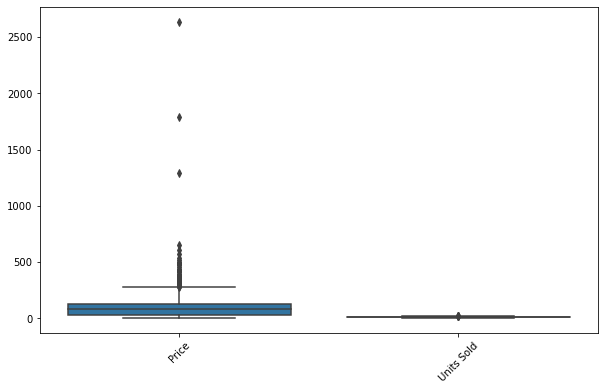

In [33]:
numerical_columns = ['Price', 'Units Sold']

# Create box plots for Price and Units Sold to visualize the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)
plt.show()

# Outliers where present in the price

In [34]:
# Just 3 outliers were recorded with prices above 1000.

df[df['Price']>1000] # viewing outliers which are prices >1000

,Product,Region,Price,Units Sold,Sale Date
269,Product_49,Region_8,1296.0,14.0,2022-09-27
407,Product_27,Region_7,1793.9,9.0,2023-02-12
421,Product_34,Region_2,2636.9,14.0,2023-02-26


In [35]:
# Create a new DataFrame without outliers

df_filtered = df[df['Price'] <= 1000]

# Rename the new DataFrame 

new_df_name = 'df_filtered'  # Choose a new name for the DataFrame
df_filtered.rename(columns={'Price': 'Filtered_Price'}, inplace=True)  # Rename the 'Price' column

# Reset the index of the new DataFrame

df_filtered.reset_index(drop=True, inplace=True)

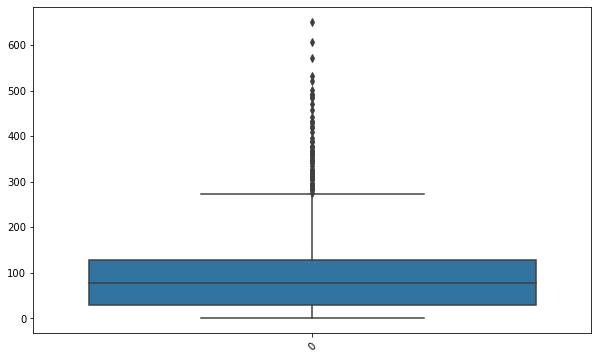

In [36]:
# View the filtered data again without the ouliers.

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered["Filtered_Price"])
plt.xticks(rotation=45)
plt.show()

In [37]:
# reset index permanently

df_filtered.reset_index(inplace=True)

In [38]:
# to view all the changes made in the df.
# My data reduced from 1050 to 997 which should be ok considering the steps I took in cleaning.

df_filtered.describe(include="all") 

,index,Product,Region,Filtered_Price,Units Sold,Sale Date
count,997.000000,997,997,997.000000,997.000000,997
unique,NaN,50,10,NaN,NaN,997
top,NaN,Product_24,Region_5,NaN,NaN,2023-10-10
freq,NaN,31,122,NaN,NaN,1
mean,498.000000,NaN,NaN,100.791864,10.161262,NaN
std,287.953411,NaN,NaN,96.902044,3.096975,NaN
min,0.000000,NaN,NaN,0.190000,2.000000,NaN
25%,249.000000,NaN,NaN,30.350000,8.000000,NaN
50%,498.000000,NaN,NaN,78.140000,10.000000,NaN
75%,747.000000,NaN,NaN,127.890000,12.000000,NaN


### 3. Data Exploration

Generating summary statistics, visualizing distributions and exploring relationships between variables. I analyzed the sales performance of various products and regions based on the cleaned dataset. I identified patterns and trends that may impact sales. 

This section answers:
What conclusions can you draw about sales performance of various products and regions?

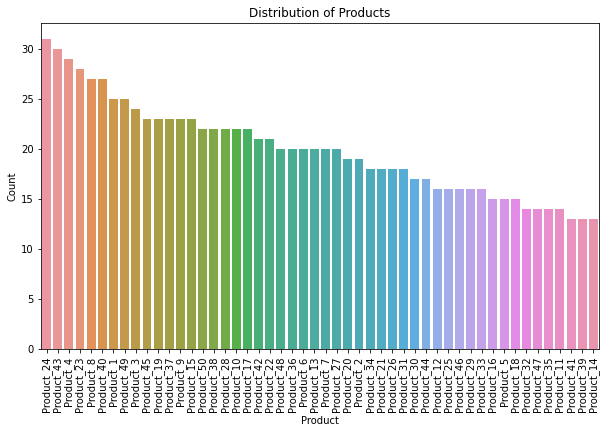

In [39]:
# Create a bar plot for the 'Product' variable
#This puts into perspective the top perfoming products.

plt.figure(figsize=(10, 6))
sns.countplot(x='Product', data=df_filtered, order=df_filtered["Product"].value_counts().index)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Distribution of Products')
plt.xticks(rotation=90)
plt.show()



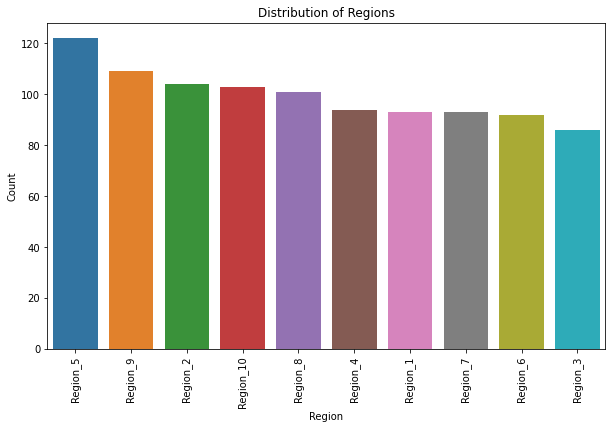

In [40]:
# Create a bar plot for the 'Region' variable
# This puts into perspective the top performing region


plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=df_filtered, order=df_filtered["Region"].value_counts().index)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Regions')
plt.xticks(rotation=90)
plt.show()

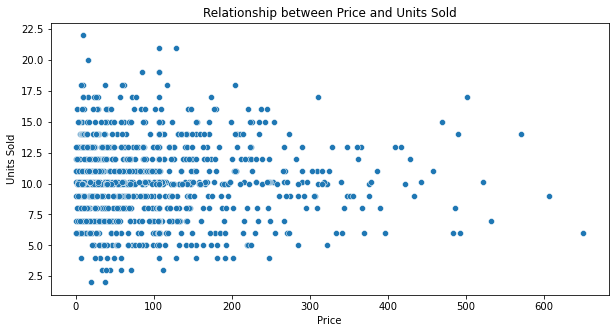

In [45]:
#this plot shows that the higher the price of the unit, the less units were sold and vice versa

# Create the scatter plot
plt.figure(figsize=(10, 5))  # Optional: Adjust the figure size
sns.scatterplot(x='Filtered_Price', y='Units Sold', data=df_filtered)

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.title('Relationship between Price and Units Sold')

# Show the plot
plt.show()

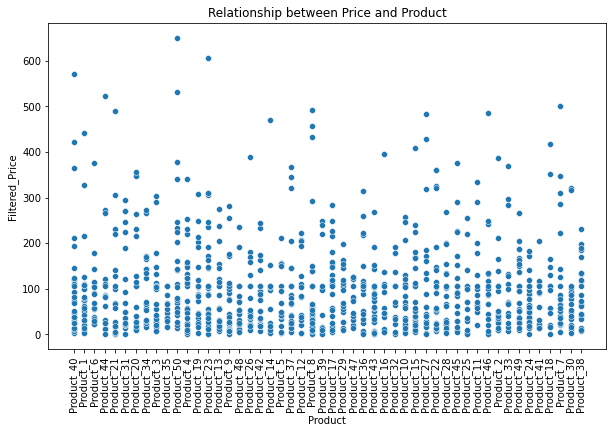

In [42]:
# This shows that for product_50 some units were sold at expensive prices. 
#This could be explored to meet that target market.

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.scatterplot(x='Product', y='Filtered_Price', data=df_filtered)

# Set labels and title
plt.xlabel('Product')
plt.ylabel('Filtered_Price')
plt.title('Relationship between Price and Product')
plt.xticks(rotation=90)

# Show the plot
plt.show()

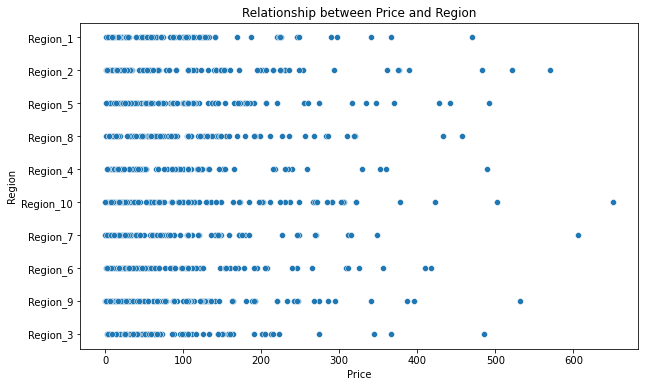

In [46]:
# This shows a regions affinity to price. 
# Which region buys for less and which regions buy for higher prices
#they were all normally separated.

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.scatterplot(x='Filtered_Price', y='Region', data=df_filtered)

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Region')
plt.title('Relationship between Price and Region')

# Show the plot
plt.show()

In [47]:
# Group the data by Product and Region, and calculate the sum of Units Sold for each combination

df2 = df_filtered.groupby(['Product', 'Region'])['Units Sold'].sum().reset_index()

# Show all data points in the DataFrame
print(df2)

       Product     Region  Units Sold
0    Product_1   Region_1   20.000000
1    Product_1  Region_10   11.000000
2    Product_1   Region_2   13.000000
3    Product_1   Region_3   36.167778
4    Product_1   Region_4   22.000000
..         ...        ...         ...
430  Product_9   Region_5   45.167778
431  Product_9   Region_6   20.167778
432  Product_9   Region_7   14.000000
433  Product_9   Region_8   32.000000
434  Product_9   Region_9   20.000000

[435 rows x 3 columns]


In [48]:
#This shows me the top 5 perfoming products and the bottom 5 performing products
# according to regions.
# This is key since the sales strategy will be centered around these.

df2_sorted = df2.sort_values('Units Sold', ascending=False)

# Show all data points in descending order
print(df2_sorted)

        Product     Region  Units Sold
422   Product_8   Region_5   74.167778
373  Product_49   Region_2   74.000000
178  Product_28  Region_10   66.167778
407   Product_6   Region_8   64.167778
279  Product_38   Region_9   60.167778
..          ...        ...         ...
324  Product_43   Region_4    5.000000
207  Product_30   Region_4    4.000000
171  Product_27   Region_3    4.000000
188  Product_29   Region_2    3.000000
356  Product_47   Region_1    2.000000

[435 rows x 3 columns]


In [49]:
# This is just my final attempt to show the most popular prodyuct and the least popular product.

# Calculate the count of each product
product_counts = df['Product'].value_counts()

# Find the most popular product(s) (highest count)
most_popular_product = product_counts.idxmax()
most_popular_count = product_counts.max()

# Find the least popular product(s) (lowest count)
least_popular_product = product_counts.idxmin()
least_popular_count = product_counts.min()

# Print the most popular and least popular products
print(f"The most popular product is {most_popular_product} with a count of {most_popular_count}.")
print(f"The least popular product is {least_popular_product} with a count of {least_popular_count}.")


The most popular product is Product_24 with a count of 31.
The least popular product is Product_41 with a count of 13.


### 4. Conclusions
Summary of my observations and conclusions regarding sales performance across different products and regions. Highlighting key insights, such as the best-selling products, top-performing regions, and any notable trends or patterns.

This section answers:
What recommendations do you have for the business?

## Insights

The most popular product is Product_24 with a count of 32.
The least popular product is Product_35 with a count of 13.
Price was a determining factor in sales. Higher prices had lower sales and vice versa. 


## Recommendations.
The most popular product is product 24. The company should increase production and continuing marketing it well since it has shown to be doing extremely well.

Additionally, for the least performing products 13, research should be conducted to understand what is influencing its low sales.

At the regionally level, some products are seen to be making more sales than the others. This could be influenced by several characteristics including customer prefernce, demographic, age etc. Eg:In region 2, product 49 is the best perfoming product(74) and product 29 is the least performing product(3). The strategy that can be adopted around this is to understand why certain products perform lower in each region. These products can be recreated to suite the region or allocated to other regions where they perform better.

In conclusion, understand the dynamics of product performance in each region and adopt the sales strategy below.


### Sales Strategy for Next Year:

##### Focus on Product 24:

Increase production of Product 24 to meet the high demand.
Continue marketing efforts for Product 24 to maintain its success.
Identify potential growth opportunities for Product 24 in new markets or customer segments.

##### Investigate Product 13:

Conduct research to understand the factors influencing the low sales of Product 13.
Identify any product-related issues, market trends, or customer preferences that may be impacting its performance.
Make necessary improvements or adjustments to enhance the appeal and sales of Product 13.

##### Region-based Product Performance:

Analyze the performance of products in each region to identify patterns and preferences.
Determine why certain products perform better in specific regions and understand the underlying reasons.
Consider reallocating underperforming products to regions where they have shown better sales performance.
Customize or adapt products to suit the preferences and needs of specific regions or demographics.

##### Monitor and Enhance Best Performing Products:

Continuously monitor and analyze the performance of the best-performing products.
Identify areas for improvement and implement strategies to maintain their success.
Stay updated on market trends and customer feedback to make any necessary adjustments or enhancements.

##### Price Evaluation:

Evaluate the pricing strategy, particularly for expensive products.
Ensure that the prices of high-end products are reasonable and aligned with customer expectations and market conditions.
Balance profitability with competitive pricing to maximize sales and maintain a healthy profit margin.


By implementing these strategies, the company can leverage the success of the most popular product, address the issues with underperforming products, optimize product allocation across regions, and continually monitor and improve the overall sales performance.

# The End